In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = pd.read_csv('../data/dataset.csv', nrows=0).columns
dtype_map = {'class' : np.int16, 'bankruptcy_after_years' : np.int16, 'year' : np.int16}
dtype_map.update({col: np.float64 for col in col_names if col not in dtype_map})

df = pd.read_csv('../data/dataset.csv', dtype=dtype_map)
df = df.drop([df.columns[0], df.columns[1], df.columns[2]], axis=1)
df.drop_duplicates(keep=False, inplace=True)
df.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,0,1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,0,1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,0,1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,0,1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,0,1


The following variables are mapped to **int16** data type:
a) **class** - binary output variable that is suitable for 2-class classification;
b) **bankruptcy_after_years** - discrete output variable with 5 possible values that is suitable for multiclass classification, range [0, 5], where 0 indicates firm was ot bakrupted, 1..5 - firm bakrupted after 1..5 years;
c) **year** - engineered discrete input variable that indicates the year when the observation was made, range [1, 5].

In [2]:
df['class'].value_counts()

0    40534
1     2075
Name: class, dtype: int64

In [50]:
df['bankruptcy_after_years'].value_counts()

0    40534
2      511
3      491
1      406
4      396
5      271
Name: bankruptcy_after_years, dtype: int64

In [57]:
df['year'].value_counts()

3    10329
2     9999
4     9628
1     6863
5     5790
Name: year, dtype: int64

In [56]:
df.shape

(42609, 67)

In [51]:
percent_missing = df.isnull().sum() / df.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Attr37,Attr37,43.868666
Attr21,Attr21,13.654392
Attr27,Attr27,6.421179
Attr60,Attr60,4.984862
Attr45,Attr45,4.973128
Attr24,Attr24,2.163862
Attr64,Attr64,1.868150
Attr53,Attr53,1.868150
Attr28,Attr28,1.868150
Attr54,Attr54,1.868150


Attributes with missing values fraction > 10%:
X37 (current assets - inventories) / long-term liabilities ~ 44%
X21 sales (n) / sales (n-1) ~ 14%

In [52]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,bankruptcy_after_years,year
count,42601.000000,42601.000000,42601.000000,42477.000000,4.252000e+04,42601.000000,42601.000000,42517.000000,42600.000000,42601.000000,...,4.252900e+04,42602.000000,4.048500e+04,42509.000000,4.248600e+04,42477.000000,41813.000000,42609.000000,42609.000000,42609.000000
mean,0.046504,0.593533,0.112906,6.373712,-3.870064e+02,-0.059096,0.102496,11.406720,2.495925,0.582465,...,3.056830e+01,1.342620,4.562674e+02,17.195150,1.516469e+03,9.393010,72.504672,0.048699,0.137060,2.940928
std,2.456032,5.896904,5.489866,298.181600,6.180798e+04,7.268185,5.617762,468.427189,57.706526,13.221351,...,5.383895e+03,123.236523,3.265091e+04,558.182979,1.405514e+05,125.325358,2386.499058,0.215240,0.670925,1.282577
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,0.000000,1.000000
25%,0.003347,0.270980,0.021584,1.049400,-4.915000e+01,0.000000,0.005704,0.426940,1.019200,0.293790,...,8.759300e-01,0.000000,5.550300e+00,4.522900,4.201025e+01,3.101600,2.192700,0.000000,0.000000,2.000000
50%,0.049660,0.473050,0.197180,1.569600,-8.087900e-01,0.000000,0.059570,1.064200,1.202150,0.504630,...,9.511900e-01,0.005979,9.808000e+00,6.657400,7.119650e+01,5.096000,4.328300,0.000000,0.000000,3.000000
75%,0.129870,0.690110,0.403960,2.783600,5.083125e+01,0.086128,0.151270,2.589200,2.077850,0.707240,...,9.927200e-01,0.236988,2.032500e+01,10.451000,1.169600e+02,8.622800,9.894800,0.000000,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000,5.000000


In [5]:
def draw_pie_chart(df, fre):
    labels = df[fre].astype('category').cat.categories.tolist()
    counts = df[fre].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

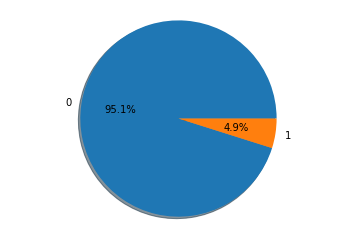

In [6]:
draw_pie_chart(df, 'class')

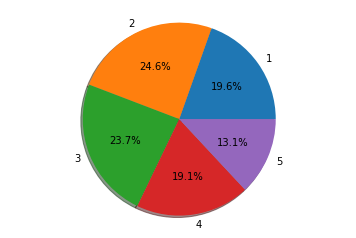

In [7]:
draw_pie_chart(df[df['bankruptcy_after_years'] > 0], 'bankruptcy_after_years')

4,9% of reports are bankrupted firms, where the majority of them were bankrupted after first 2 yeats, and the minority - after 5 years.

In [5]:
def plot_bankruptcy_classes_distribution():    
    plt.figure(figsize=(16, 8))
    
    temp = df[df['bankruptcy_after_years'] > 0]
    count = temp['bankruptcy_after_years'].value_counts()
    del temp
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=15)
    plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
    plt.show()

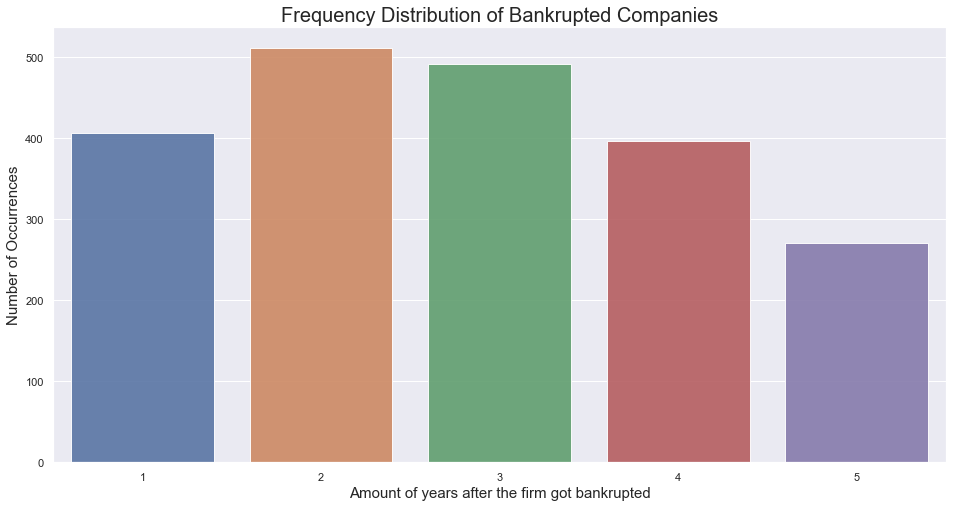

In [6]:
plot_bankruptcy_classes_distribution()

In [47]:
def plot_all_classes_distribution():    
    plt.figure(figsize=(16, 8))    
    count = df['bankruptcy_after_years'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution of Bankrupted Companies', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=15)
    plt.xlabel('Amount of years after the firm got bankrupted', fontsize=15)
    plt.show()

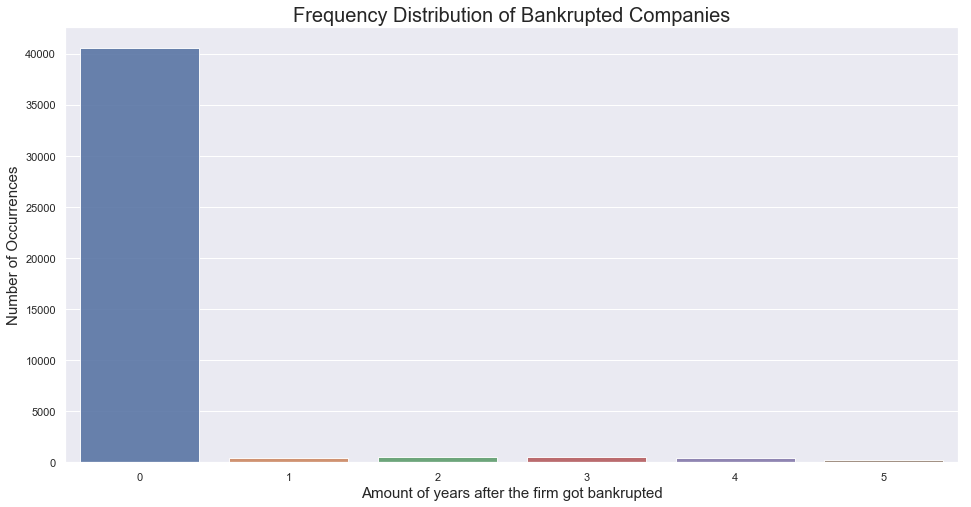

In [48]:
plot_all_classes_distribution()

The Anderson-Darling test evaluates whether the sample from the population follows a particular distribution. If the test statistic is higher than a critical value, the null hypothesis is rejected at the corresponding significance level (i.e there is evidence to suggest that the population doesn’t follow that particular distribution).

In [54]:
import scipy.stats

scipy.stats.anderson(df['class'], dist='norm')

AndersonResult(statistic=15423.279869728576, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [53]:
scipy.stats.anderson(df['bankruptcy_after_years'], dist='norm')

AndersonResult(statistic=14841.419699613223, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

According to the outputs of binary and 5-class output variable values arrays, the null hypothesis is rejected at all significance levels here as the test statistic is higher than all the critical values. Thus classes distribution doesn't follow normal distribution. The features correlation is going to be checked based on Spearman's correlation coefficient values.

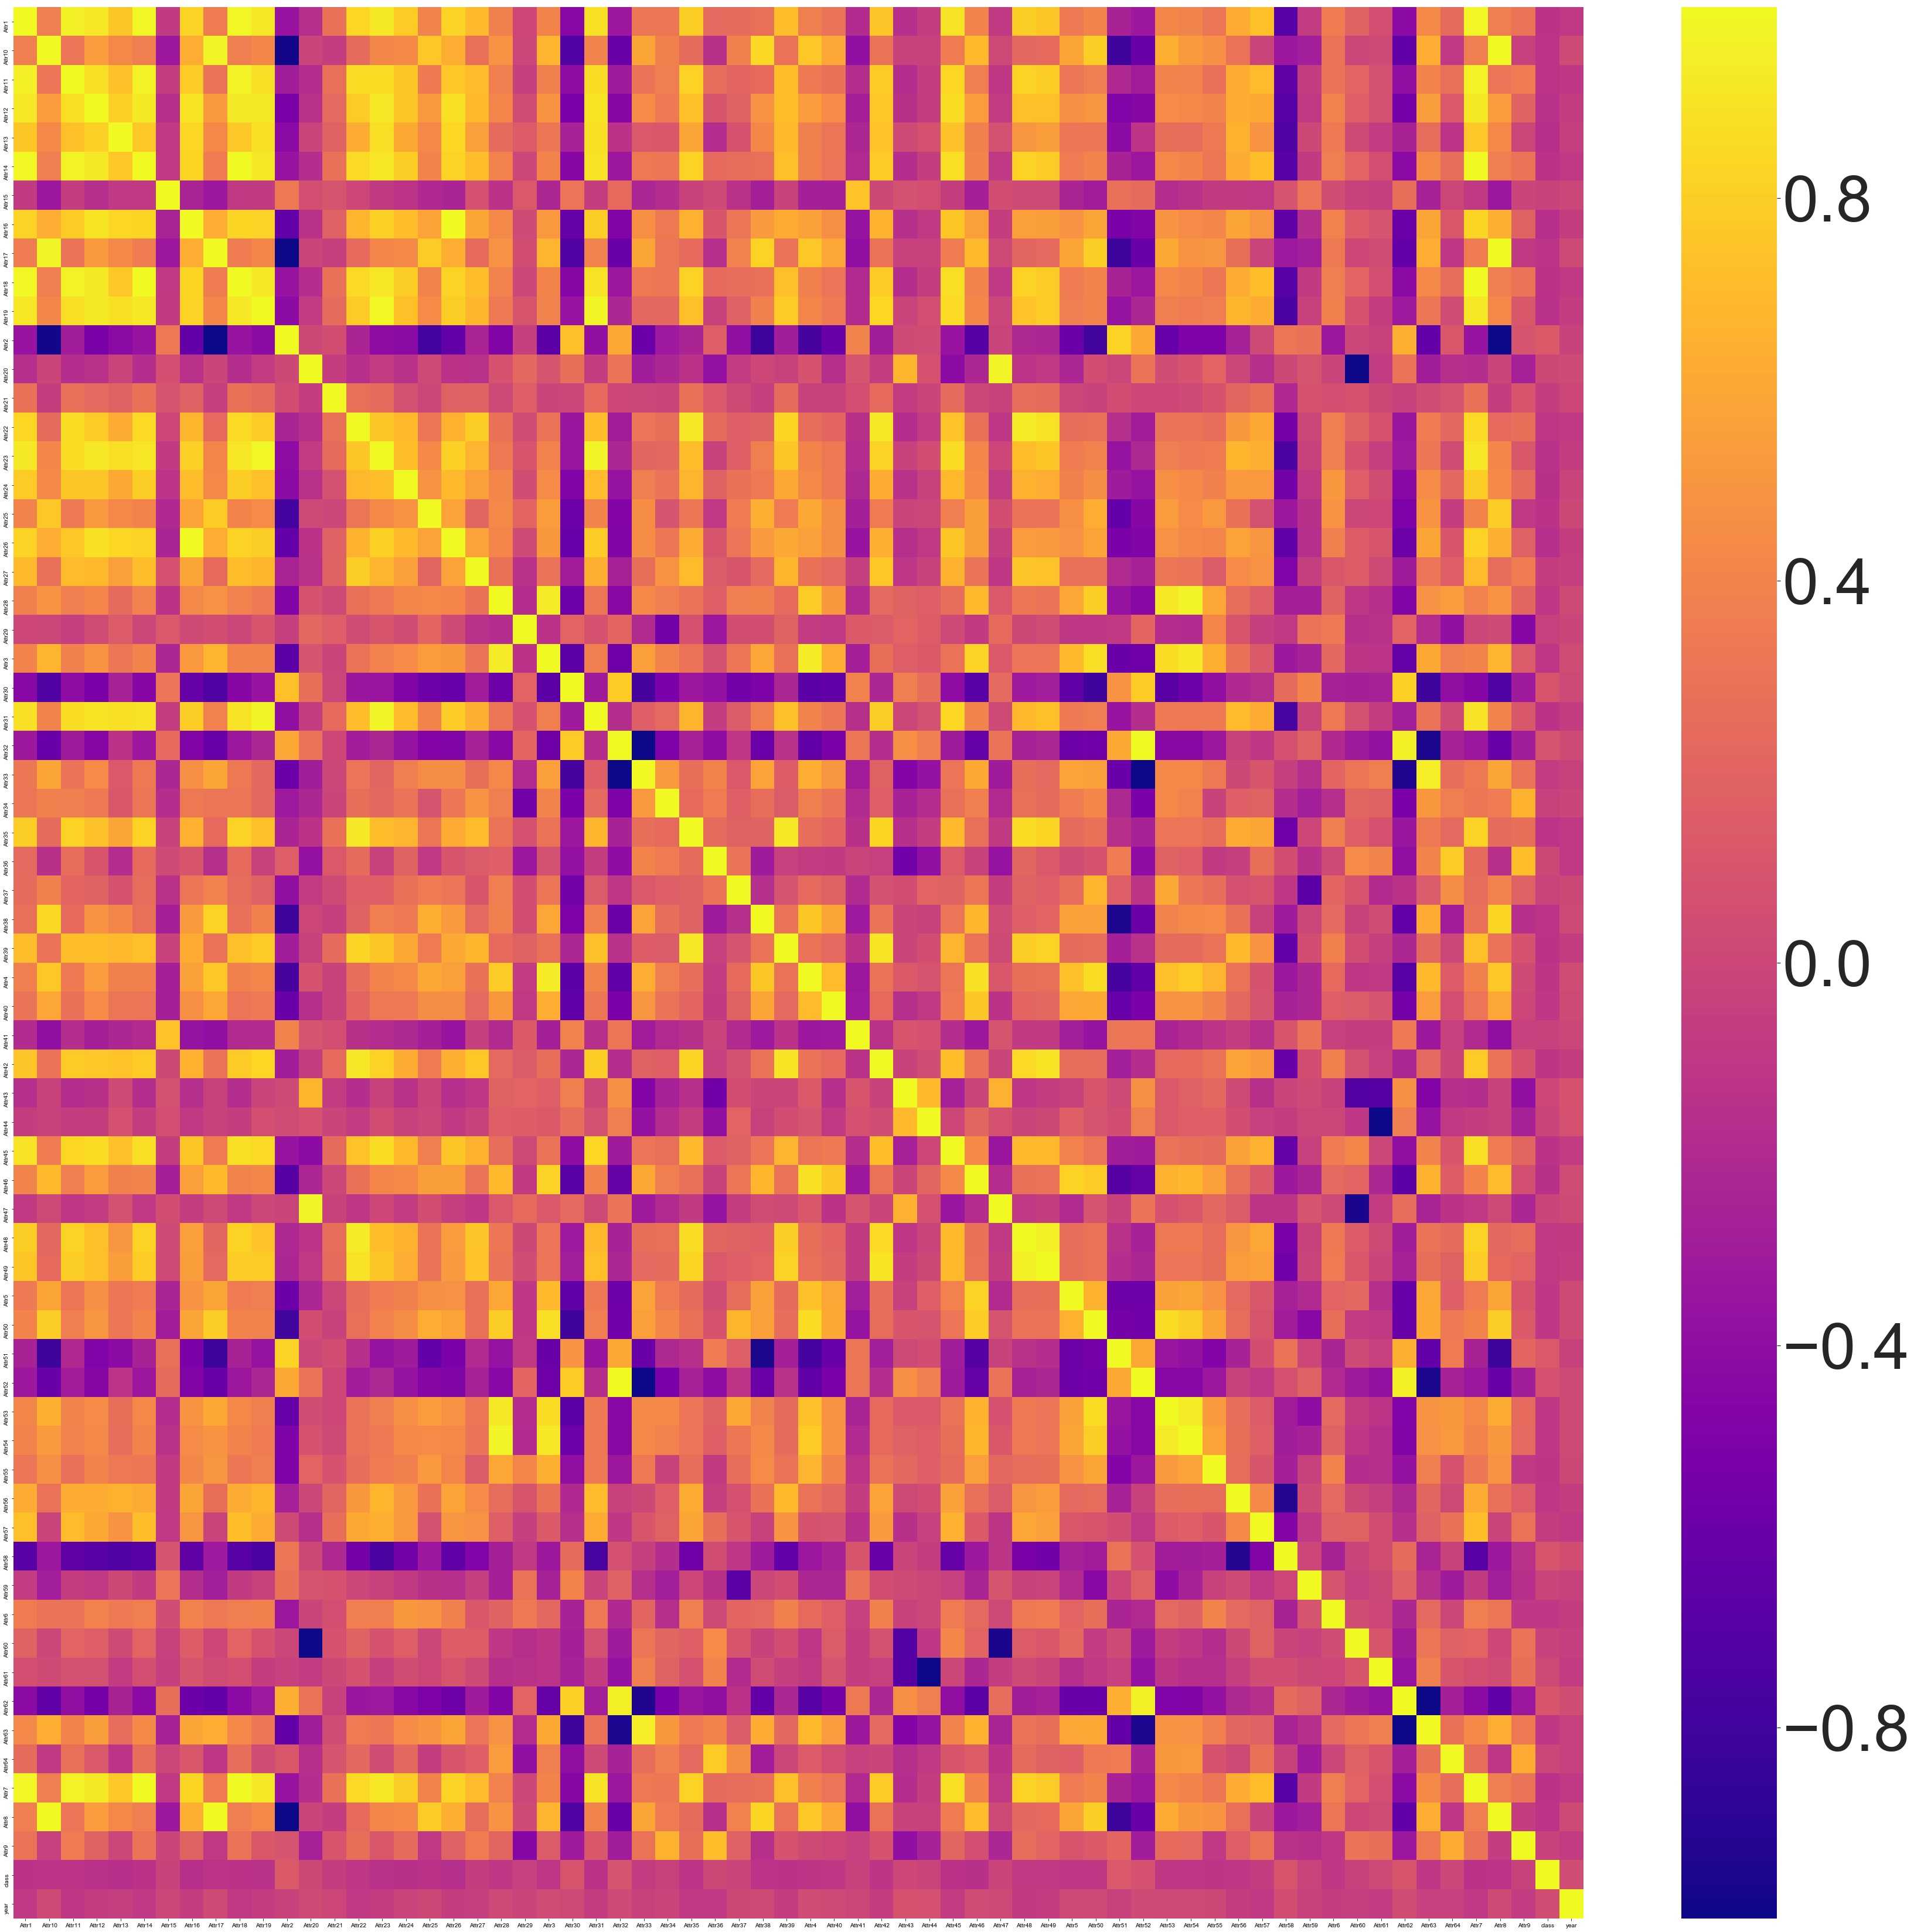

In [36]:
def plot_spearman(data):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.set(font_scale=10)
    correlation_matrix = data.corr(method='spearman', min_periods=1)
    sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.show()

plot_spearman(df[df.columns.difference(['bankruptcy_after_years'])])


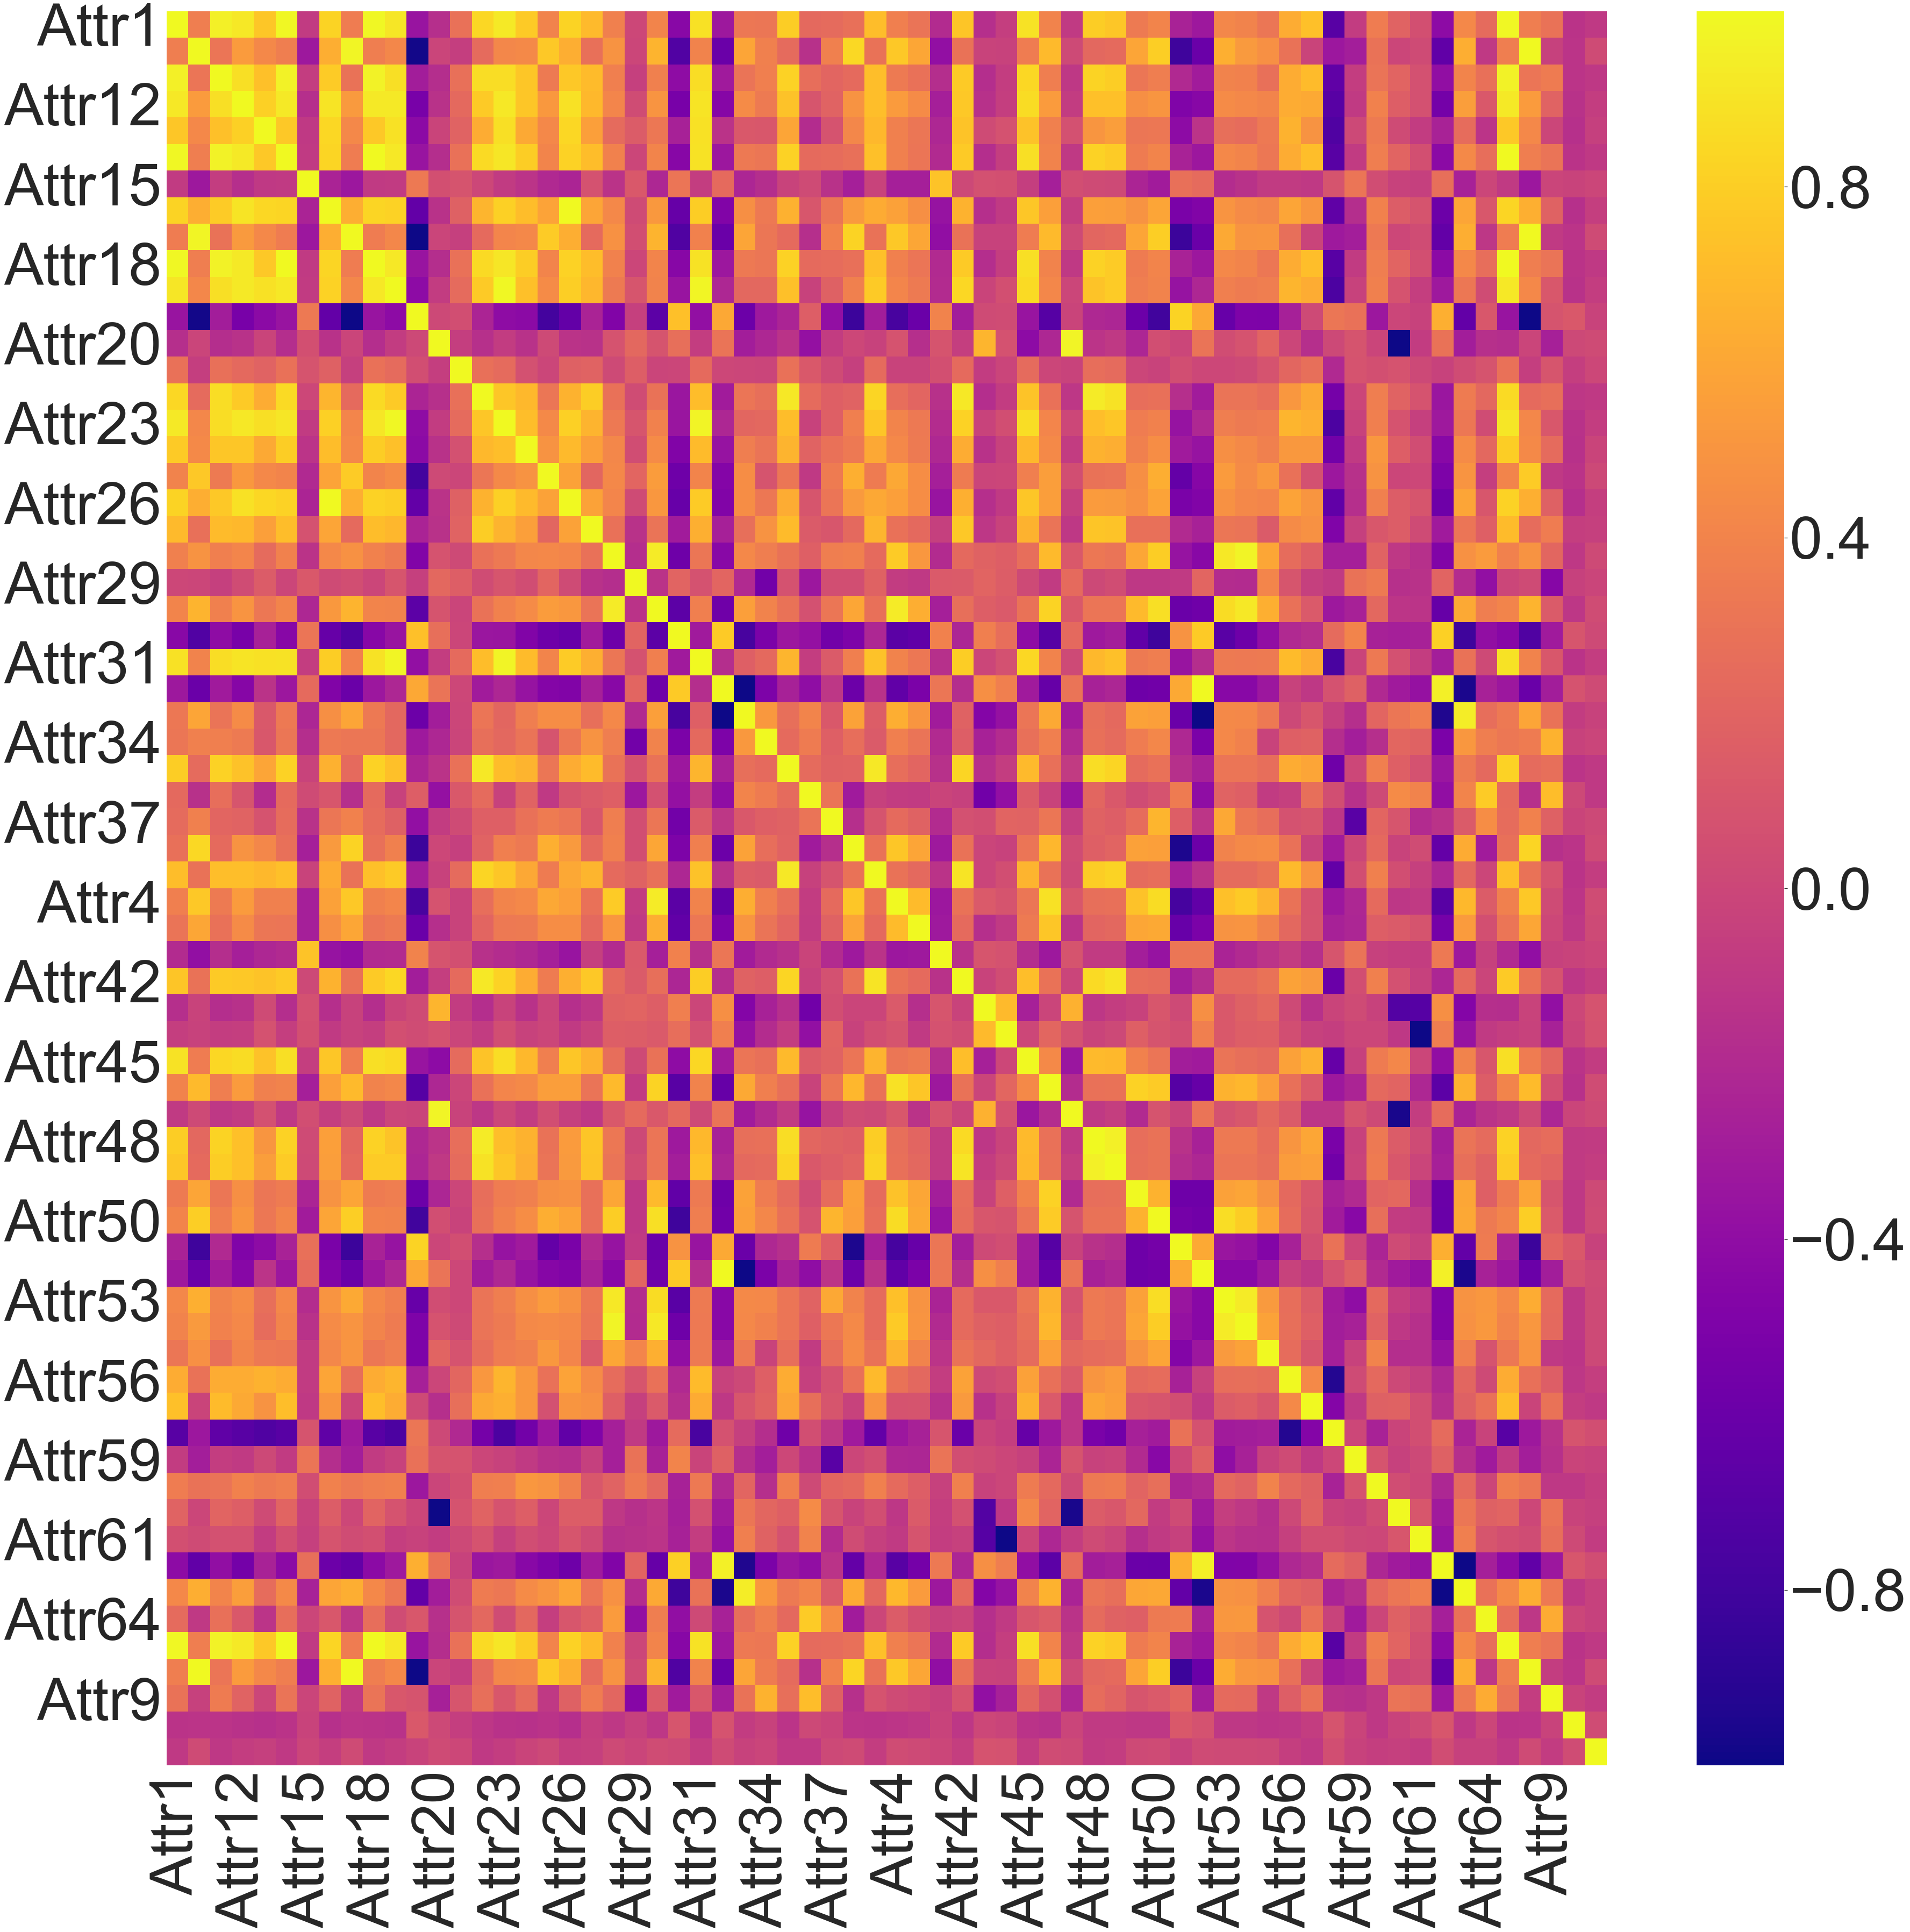

In [59]:
plot_spearman(df[df.columns.difference(['class'])])

According to correlation plots, in both cases there is a lot of features with too high correlation. Such features can be dropped either based om Spearman's correlation coefficient or based on classifiers significance values.

In [33]:
def drop_lin_correlated(df_in, method):
    lower_bound = 0
    upper_bound = 0.8
    corr_matrix = df_in.corr(method=method, min_periods=1).abs()
    # the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find indices of feature columns with correlation greater than 0.80
    features_above_max = [column for column in upper.columns if any(upper[column] > upper_bound)]
    # Find indices of feature columns with correlation less than 0
    features_below_min = [column for column in upper.columns if any(upper[column] < lower_bound)]
    features_to_drop = features_above_max + features_below_min
    df_out = df_in.drop(features_to_drop, axis=1)

    return df_out

bin_cl_df = df[df.columns.difference(['bankruptcy_after_years'])]
filtered_out_features_bin = drop_lin_correlated(bin_cl_df, method="spearman")
filtered_out_features_bin.columns.values

array(['Attr1', 'Attr10', 'Attr15', 'Attr20', 'Attr21', 'Attr24',
       'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32',
       'Attr34', 'Attr36', 'Attr37', 'Attr40', 'Attr41', 'Attr43',
       'Attr44', 'Attr55', 'Attr56', 'Attr57', 'Attr59', 'Attr6',
       'Attr64', 'Attr9', 'class', 'year'], dtype=object)

In [34]:
len(filtered_out_features_bin.columns.values)

28

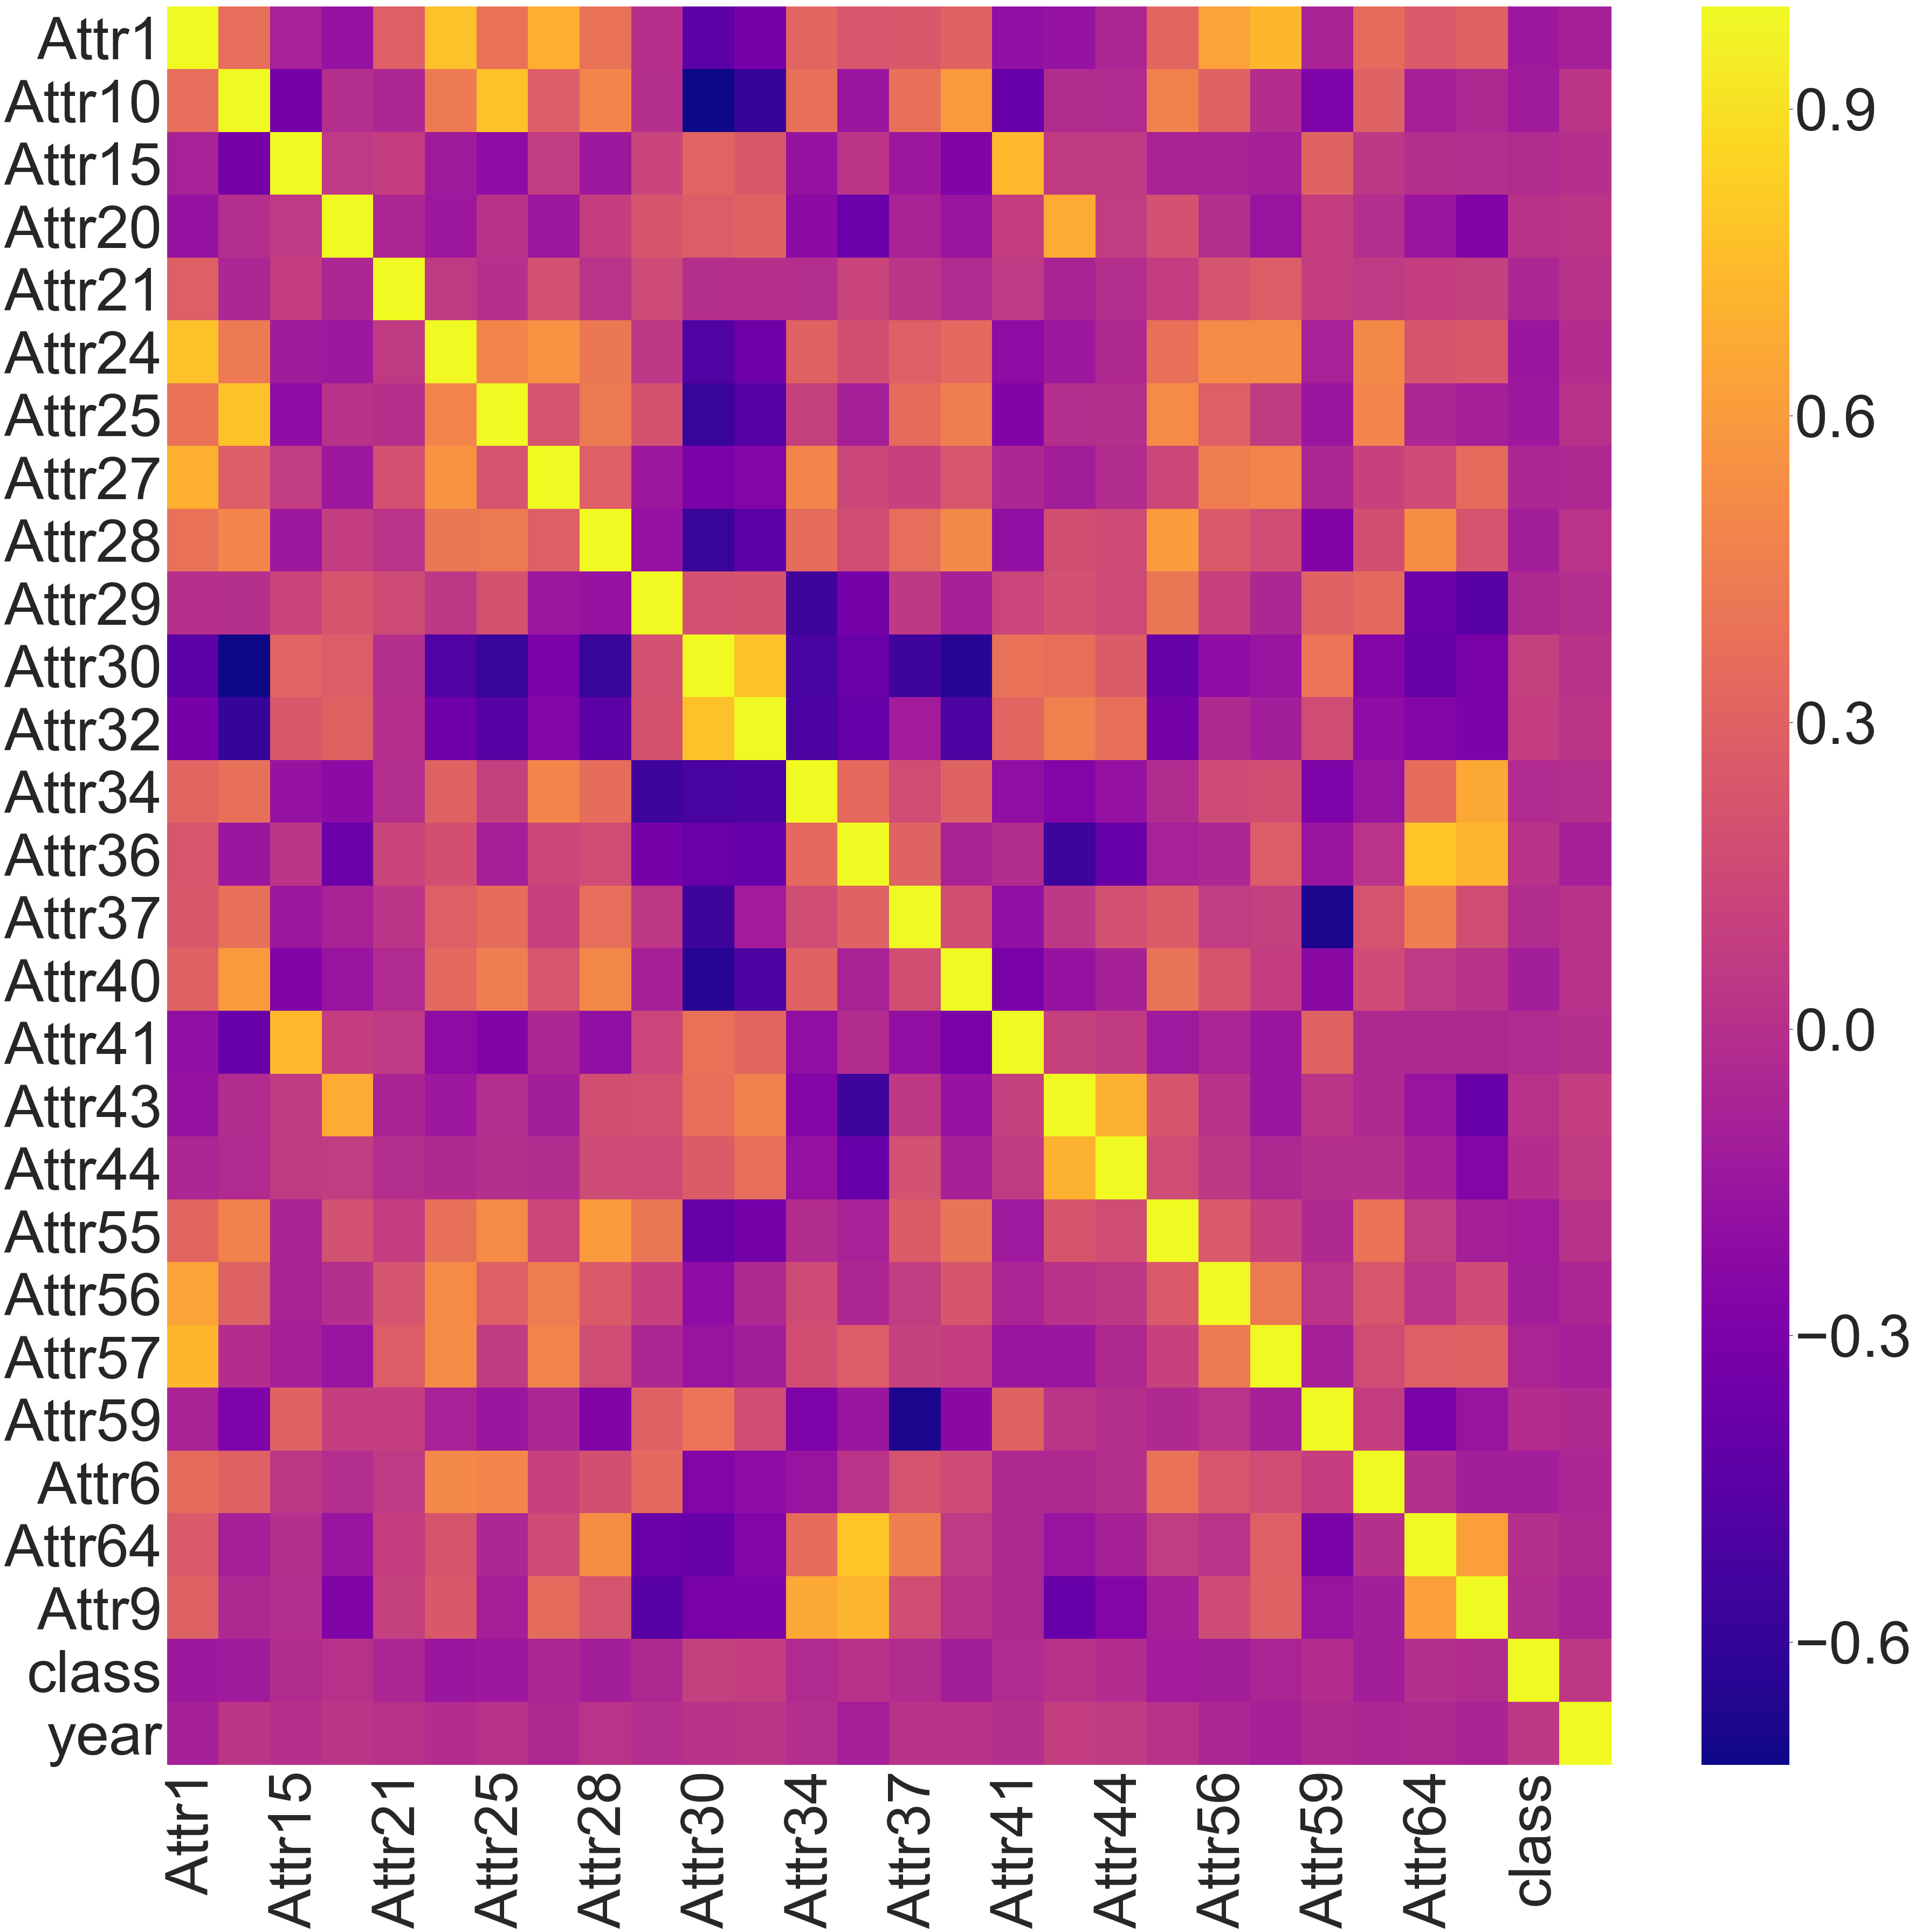

In [37]:
plot_spearman(filtered_out_features_bin)

In [38]:
multi_cl_df = df[df.columns.difference(['class'])]
filtered_out_features_multi = drop_lin_correlated(multi_cl_df, method="spearman")
len(filtered_out_features_multi.columns.values)

28

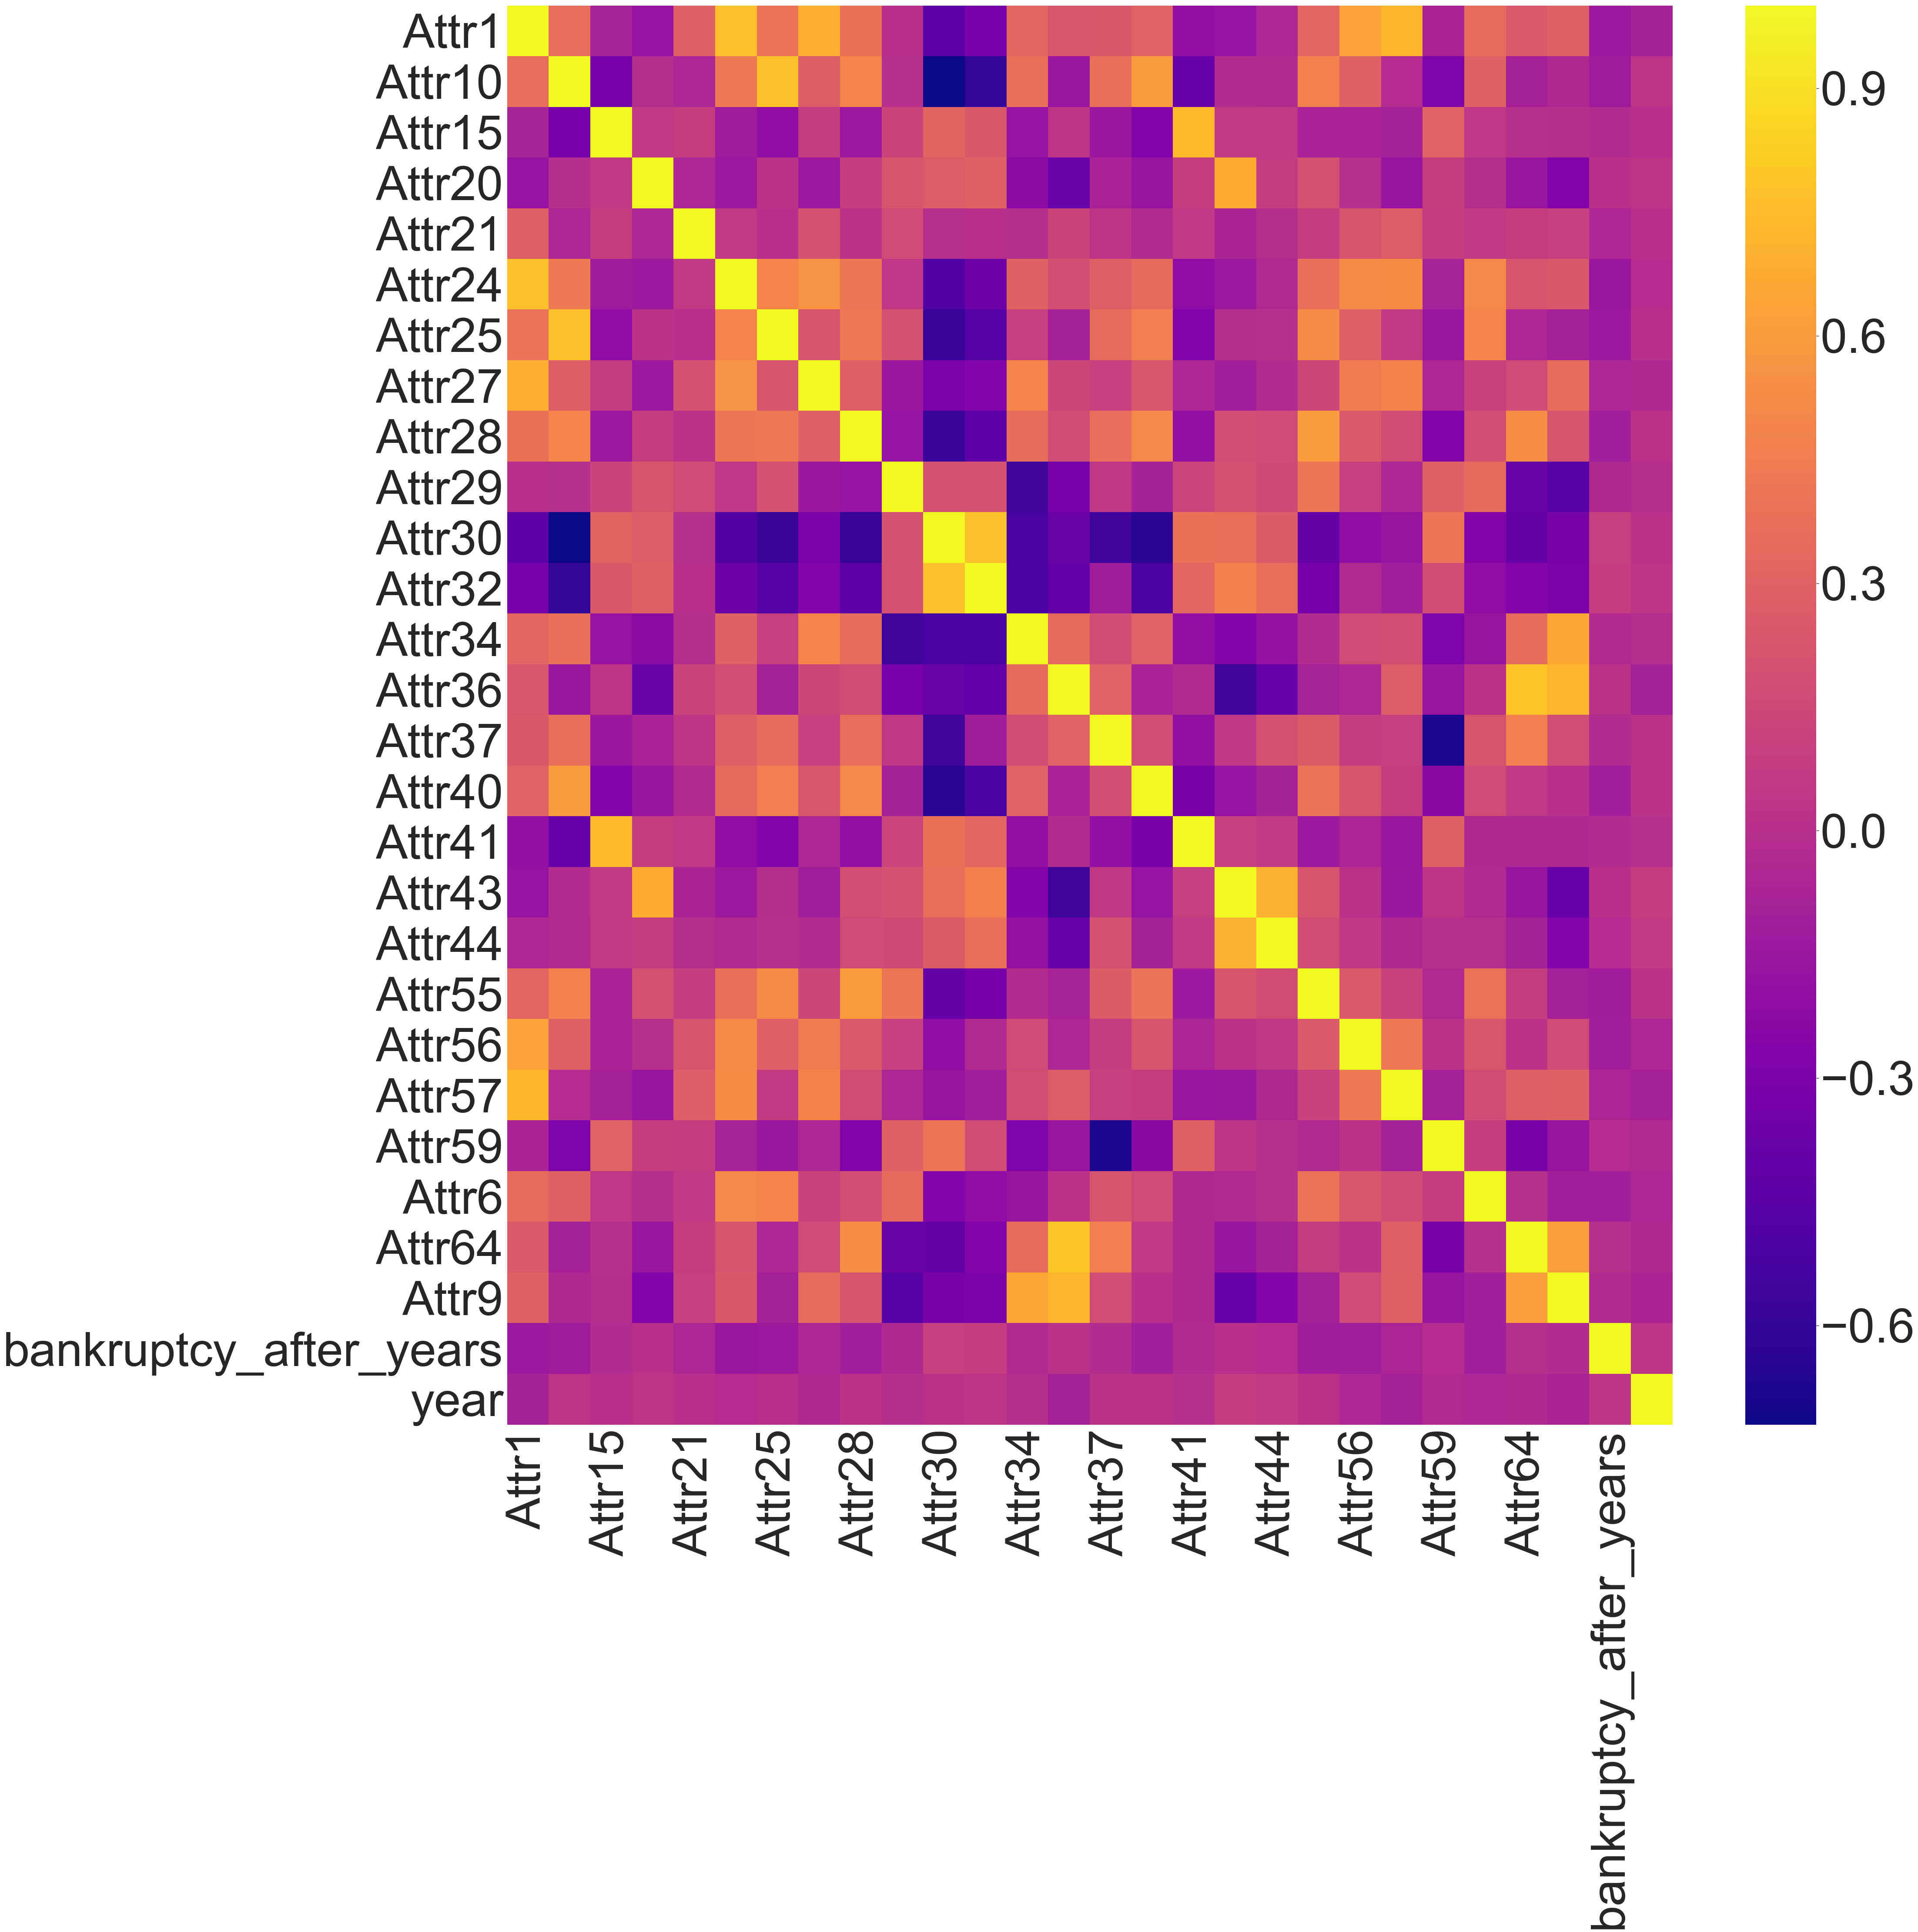

In [10]:
plot_spearman(filtered_out_features_multi)

After dropping out features with too high correlation and negative correlation, there are still features left that either have extremely negative or too high Spearman's correlation coefficient value, thus not all features that are strongly correlated were dropped out based on coefficient range [0, 0.80].

Features that have extremely negative correlation:
- X59 **long-term liabilities** / equity and X37 (current assets - inventories) / **long-term liabilities**
- X40 (current assets - inventory - receivables) / short-term **liabilities** and X30  (total **liabilities** - cash) / sales
- X40 (current assets - inventory - receivables) / short-term **liabilities** and X32 (current **liabilities** * 365) / cost of products sold

Features that have extremely high correlation:
- X64 sales / fixed **assets** and X36 total sales / total **assets**

Now let us test the null hypothesis that the samples are uncorrelated pairwise:

In [45]:
corr_matrix = filtered_out_features_multi.corr(method='spearman', min_periods=1)
corr_matrix['Attr59']['Attr37']

-0.6845839654065214

In [47]:
corr_matrix['Attr40']['Attr30']

-0.6407905052697017

In [48]:
corr_matrix['Attr40']['Attr32']

-0.5112712816498363

In [49]:
corr_matrix['Attr64']['Attr36']

0.78650540159571

- X64 and X36 variables are still in the range [0, 0.80], so null hypothesis is accepted;
- X59 & X37, X40 & X30, X40 & X32 are out of range [0, 0.80] as they have strong negative correlation, so null hypothesis is rejected.

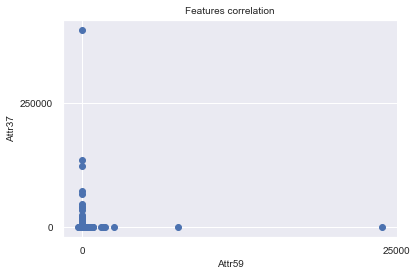

In [50]:
def plot_correlation(fre1, fre2):
    ax = plt.subplot(111, xlabel=fre1, ylabel=fre2, title='Features correlation')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                  ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(10)
    plt.scatter(df[fre1], df[fre2])
    plt.show()

plot_correlation('Attr59', 'Attr37')

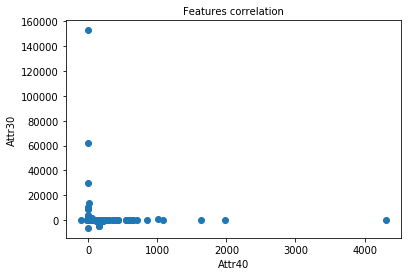

In [6]:
plot_correlation('Attr40', 'Attr30')

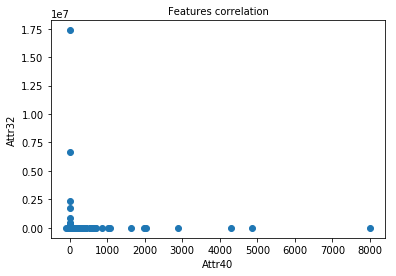

In [7]:
plot_correlation('Attr40', 'Attr32')

As it is seen from the features correlation plots above, the features with the lowest correlation values have strong negative non-linear relationship.

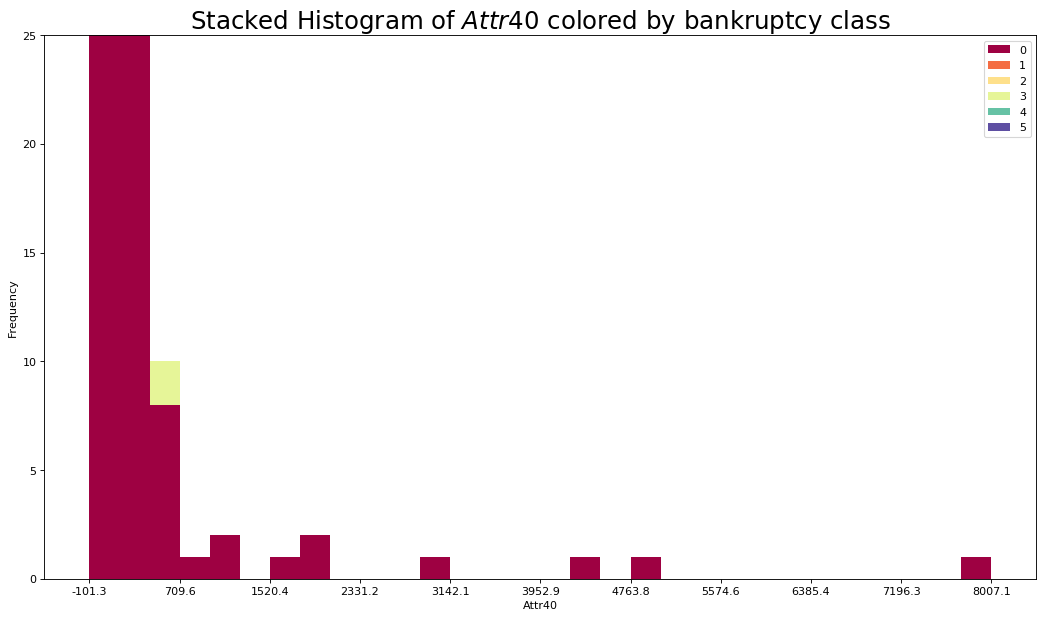

In [11]:
def plot_stacked_hist(x_var, groupby_var):
    df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [df[x_var].values.tolist() for i, df in df_agg]

    # Draw
    plt.figure(figsize=(16,9), dpi= 80)
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

    # Decoration
    plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Stacked Histogram of ${x_var}$ colored by bankruptcy class", fontsize=22)
    plt.xlabel(x_var)
    plt.ylabel("Frequency")
    plt.ylim(0, 25)
    plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
    plt.show()

plot_stacked_hist('Attr40', 'bankruptcy_after_years')

 X 40 (current assets - inventory - receivables) / short-term liabilities variables has the majority of values belonging to not bunkrupted firms, the minority - the firms bankrupted after 3 years.

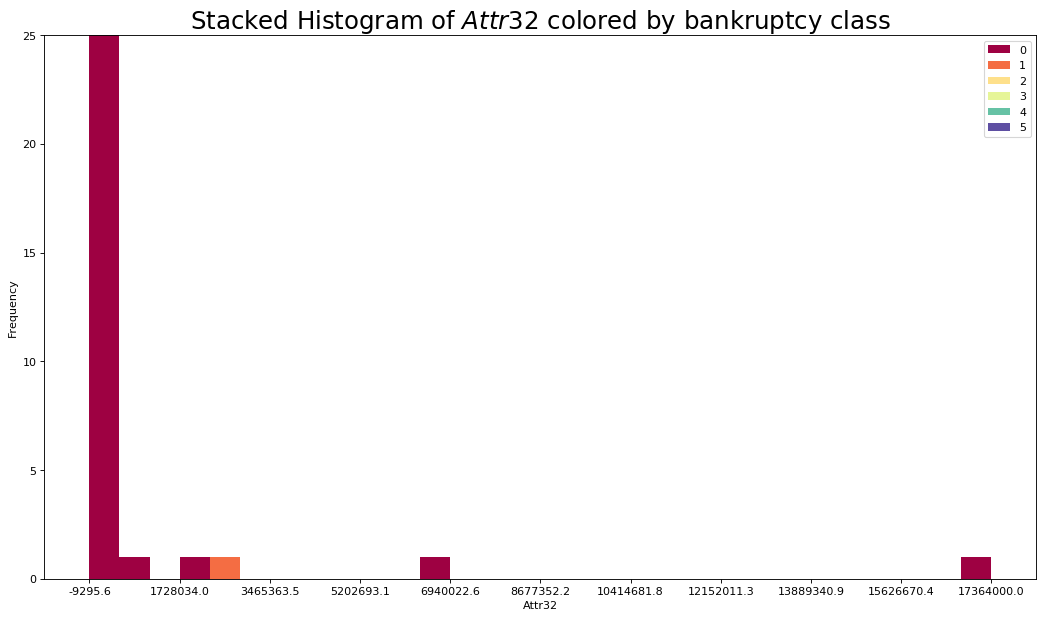

In [12]:
plot_stacked_hist('Attr32', 'bankruptcy_after_years')

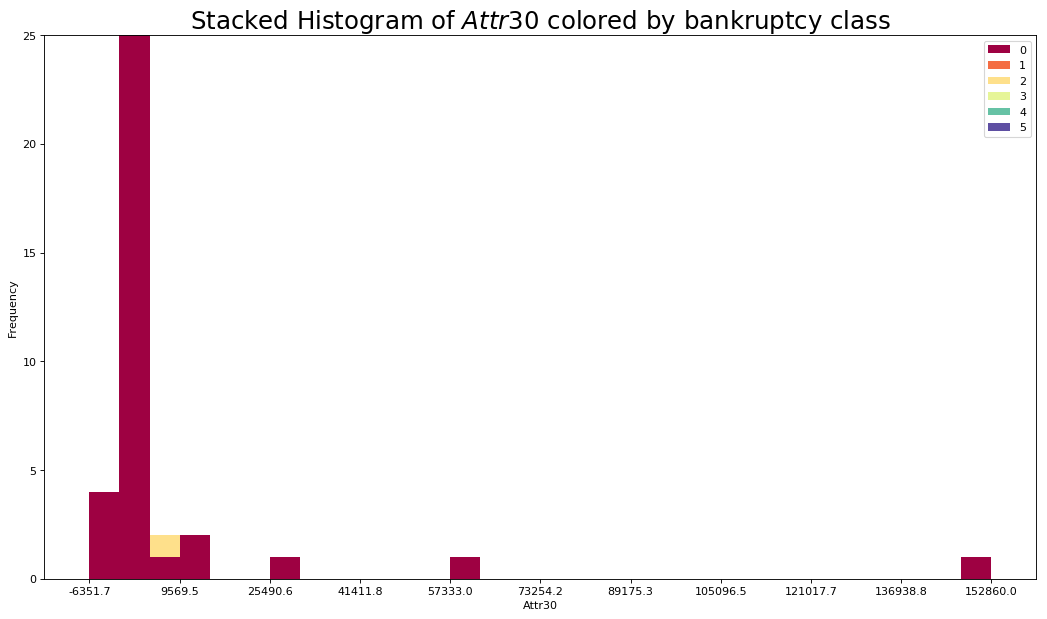

In [13]:
plot_stacked_hist('Attr30', 'bankruptcy_after_years')

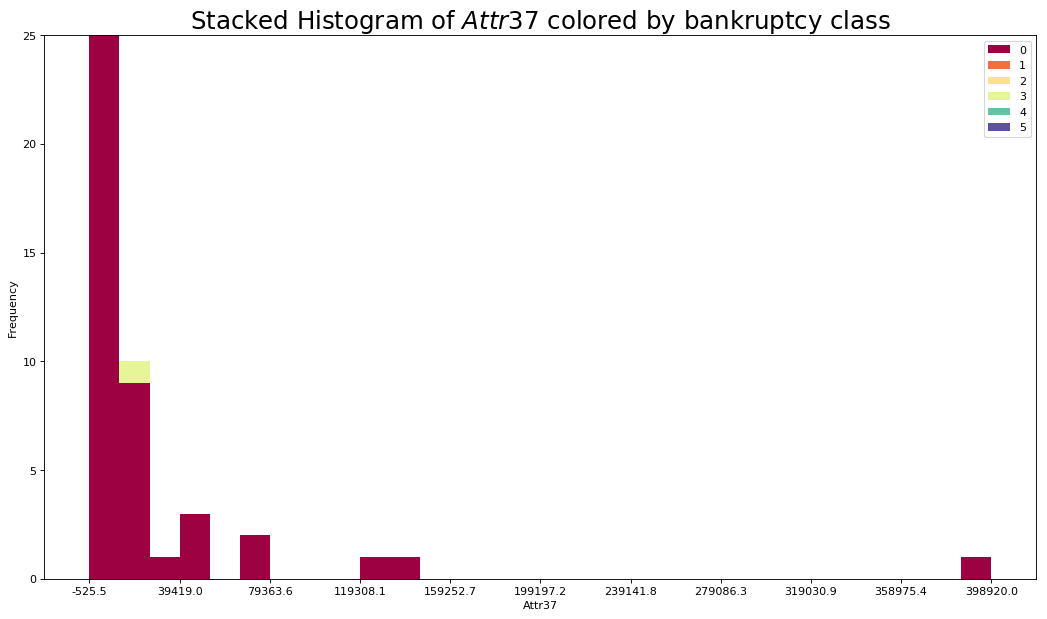

In [14]:
plot_stacked_hist('Attr37', 'bankruptcy_after_years')

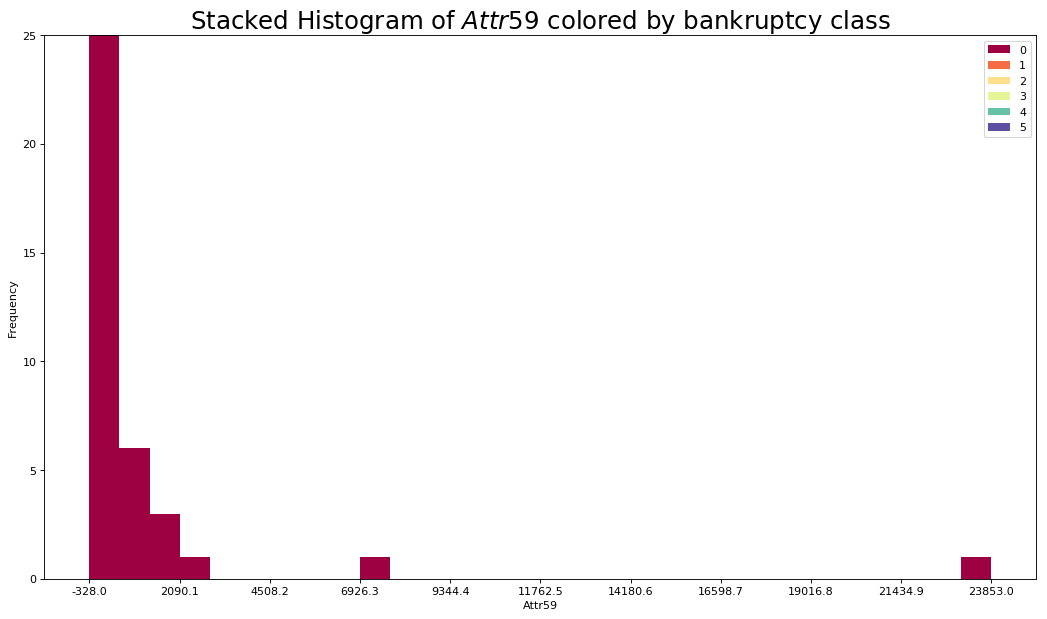

In [15]:
plot_stacked_hist('Attr59', 'bankruptcy_after_years')

As it is seen from the stacked histograms, all features that have the lowest Spearman's coefficient value have the majority of instances belonging to the non-bakrupted class. Frequency distributions are strong negative non-linear.
X59 (long-term liabilities / equity) feature has values belonging only to the non-baknrupted class.